# Get Galaxies From Halos

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
path: /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.table import Table, vstack, join
from astropy.io.fits import getdata

import pandas as pd

import esutil

In [2]:
!ls /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v1.9.8_Y3a_mastercat/

buzzard-1.9.8_3y3a_run_redmapper_v6.4.22.h5  readh5.py
Buzzard-3_v1.9.8_Y3a_mastercat.h5	     sompz_buzzard.h5
Buzzard_v1.9.8_Y3a_bpz.h5		     test_z_chat.png
Buzzard_v1.9.8_Y3a_gold.h5		     test_z.png
Buzzard_v1.9.8_Y3a_shape.h5		     Y3_GOLD_2_2_1_maps_copy.h5
nohup.out				     zs_lowhigh.png
pdf_sompz.png


## Load

In [114]:
import h5py

path   = '/data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v1.9.8_Y3a_mastercat/'

fname  =  path+'Buzzard_v1.9.8_Y3a_gold.h5'
fname_aux = path+'Buzzard-3_v1.9.8_Y3a_mastercat.h5'

# fname  =     path+'Buzzard_v1.9.8_Y3a_gold.h5'
# fname_aux  = path+'Buzzard-3_v1.9.8_Y3a_mastercat.h5'

master = h5py.File(fname,'r')
indexes= h5py.File(fname_aux,'r')

In [115]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [116]:
columns = ['hpix_16384','haloid','coadd_object_id','ra','dec','rhalo']
columns+= ['mag_%s'%(ix) for ix in ['g','r','i','z']]
columns+= ['mag_err_%s'%(ix) for ix in ['g','r','i','z']]

In [117]:
columns

['hpix_16384',
 'haloid',
 'coadd_object_id',
 'ra',
 'dec',
 'rhalo',
 'mag_g',
 'mag_r',
 'mag_i',
 'mag_z',
 'mag_err_g',
 'mag_err_r',
 'mag_err_i',
 'mag_err_z']

In [118]:
indexes.visititems(show_h5_dataset)

(u'catalog/downsampled_dm/px', <HDF5 dataset "px": shape (128581096,), type ">f8">)
(u'catalog/downsampled_dm/py', <HDF5 dataset "py": shape (128581096,), type ">f8">)
(u'catalog/downsampled_dm/pz', <HDF5 dataset "pz": shape (128581096,), type ">f8">)
(u'catalog/downsampled_dm/vx', <HDF5 dataset "vx": shape (128581096,), type ">f8">)
(u'catalog/downsampled_dm/vy', <HDF5 dataset "vy": shape (128581096,), type ">f8">)
(u'catalog/downsampled_dm/vz', <HDF5 dataset "vz": shape (128581096,), type ">f8">)
(u'catalog/downsampled_dm/z_cos', <HDF5 dataset "z_cos": shape (128581096,), type ">f8">)
(u'catalog/sompz/unsheared/bhat', <HDF5 dataset "bhat": shape (1505017869,), type ">i8">)
(u'catalog/sompz/unsheared/chat', <HDF5 dataset "chat": shape (1505017869,), type ">i4">)
(u'catalog/sompz/unsheared/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1505017869,), type "<i8">)
(u'catalog/dnf/unsheared/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1505017869,), type "<i8">)
(u'c

In [119]:
master.visititems(show_h5_dataset)

(u'catalog/gold/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1505017869,), type ">i8">)
(u'catalog/gold/dec', <HDF5 dataset "dec": shape (1505017869,), type ">f4">)
(u'catalog/gold/flags_gold', <HDF5 dataset "flags_gold": shape (1505017869,), type ">i8">)
(u'catalog/gold/flux_g', <HDF5 dataset "flux_g": shape (1505017869,), type ">f4">)
(u'catalog/gold/flux_i', <HDF5 dataset "flux_i": shape (1505017869,), type ">f4">)
(u'catalog/gold/flux_r', <HDF5 dataset "flux_r": shape (1505017869,), type ">f4">)
(u'catalog/gold/flux_z', <HDF5 dataset "flux_z": shape (1505017869,), type ">f4">)
(u'catalog/gold/haloid', <HDF5 dataset "haloid": shape (1505017869,), type ">i8">)
(u'catalog/gold/hpix_16384', <HDF5 dataset "hpix_16384": shape (1505017869,), type ">i8">)
(u'catalog/gold/ivar_g', <HDF5 dataset "ivar_g": shape (1505017869,), type ">f4">)
(u'catalog/gold/ivar_i', <HDF5 dataset "ivar_i": shape (1505017869,), type ">f4">)
(u'catalog/gold/ivar_r', <HDF5 dataset "ivar_r": shape (150

In [120]:
select     = indexes['index/gold/select'][:]
mag_i      = master['catalog/gold/mag_i'][:][select]
maglim_idx = select[mag_i<=23.5]

hpx16384   = master['catalog/gold/hpix_16384'][:][maglim_idx]
ra         = master['catalog/gold/ra'][:][maglim_idx]
dec        = master['catalog/gold/dec'][:][maglim_idx]
select=mag_i=0

master.close()
indexes.close()

In [121]:
select=mag_i=0

In [123]:
hpx32 = radec_pix(ra,dec,nside=32)
ra = dec = 0

In [122]:
# indexes= h5py.File(fname_aux,'r')
# dnf    = indexes['catalog/dnf/unsheared']

# d_cid  = dnf['coadd_object_id'][:][maglim_idx]
# d_z    = dnf['z'][:][maglim_idx]
# d_zmean= dnf['z_mean'][:][maglim_idx]
# d_sigma= dnf['z_sigma'][:][maglim_idx]

# indexes.close()

## Load All Halos Catalog

In [124]:
def read_halos(profile_output_fname, halo_run_fname):
    ### read in profile file
    data = Table(getdata(profile_output_fname))
    data_h = Table(getdata(halo_run_fname))
    
    #### discard bad halos ####
    cosi_all = data['cosi']
    pid_all = data['pid']
    redshift = data['redshift']
    
    select_good = (pid_all==-1)&(cosi_all>=0)&(cosi_all<=1)##&(self.lam_all > 3)
    select_good = select_good & ((redshift < 0.33)|(redshift > 0.37))
    
    print('all vs good',len(cosi_all), len(cosi_all[select_good]))
    data_h.rename_column('HALOID','haloid')
    table = join(data_h,data[select_good],keys=['haloid'])
    return table


In [125]:
path_halo = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/halos/'
profile_output_fname = path_halo+'buzzard-1.9.8_3y3a_run_halos_profiles.fit'
halo_run_fname = path_halo + 'buzzard-1.9.8_3y3a_run_halos_lambda_chisq_mu_star.fit'
cat = read_halos(profile_output_fname, halo_run_fname)

('all vs good', 1418121, 611205)


In [14]:
# cat

In [163]:
# _ = plt.hist(cat['rmax'],bins=41)
# plt.axvline(25,)
# plt.yscale('log')

In [162]:
# import healpy as hp

# plt.scatter(zcls[::10],cat['rmax'][::10])
# plt.axhline(hp.nside2resol(32,arcmin=True)/2.)

In [113]:
np.sort(np.append(hp.get_all_neighbours(32, tile, nest=True),tile))

array([8926, 8927, 8948, 8949, 8950, 8951, 9098, 9120, 9122])

In [109]:
w      = esutil.numpy_util.where1(cluster_tile==tile)
circles= get_healpix_list(cat[w],nside=32)
print(np.sort(circles))


[8926 8927 8948 8949 8950 8951 9098 9120 9122]


In [103]:
tile

8949

109.93556517815699

## Create Healpix Map

In [128]:
import sys
sys.path.append('/data/des61.a/data/johnny/DESY3/projects/buzzardAllHalos/CopacabanaRuns/selection/scripts/')
from helper import AngularDistance,get_healpix_list,radec_pix

In [129]:
rac = cat['RA']
decc = cat['DEC']
zcls = np.array(cat['redshift'])
r200     = cat['R200'][:]*0.7 ## Mpc

In [130]:
cluster_tile = radec_pix(rac,decc,nside=32)
myfields = np.unique(cluster_tile)

In [131]:
print('Number of fields: %i'%len(myfields))

Number of fields: 1698


In [19]:
Nside = 16384
rad2deg  = 180/np.pi
rmax     = 8 #Mpc around each cluster

DA       = AngularDistance(zcls)

## compute the radii max
cat['rmax']  = 60*(float(rmax)/DA)*rad2deg ## arcmin

## Saving Each Field

In [132]:
outdir = '/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/'
outfile_base = outdir+'buzzard_y3_v1.9.8_all_raw_hpx8_{:06d}.hdf'

In [133]:
outfile_base.format(31)

'/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/buzzard_y3_v1.9.8_all_raw_hpx8_00031.hdf'

### Retrieving Galaxy Catalogs

In [134]:
def save_hdf5_output(gal,outfile):
    df  = gal.to_pandas()
    df.to_hdf(outfile, key='members', mode='w')

    gal = 0

In [135]:
def load_hdf_files(infile,indices,columns,path='catalog/gold/'):
    master = h5py.File(infile,'r')
    gold   = master[path]
    
    mydict = dict().fromkeys(columns)
    
    mydict['id'] = indices
    for col in columns:
        mydict[col] = gold[col][:][indices]
    
    master.close()
    return Table(mydict)

## Retrieve Second Method

In [136]:
idx = np.random.randint(len(myfields),size=3)
myfields = myfields[idx] # for test purposes only
array_path = outdir+'tmp/'

In [94]:
from time import time

In [137]:
print('Starting Query')
t0 = time()
time_evolution = np.empty((len(myfields)+1,),dtype=np.float64)
time_evolution[0] = t0

for i, tile in enumerate(myfields[:3]):
    print('start tile: %i'%(tile))
    w      = esutil.numpy_util.where1(cluster_tile==tile)
    print('Number Of Clusters: %i'%(w.size))
    
    circles = np.append(hp.get_all_neighbours(32, tile, nest=True),tile)
    #circles= get_healpix_list(cat[w],nside=Nside)
    print('Circles: done')
    
    #match  = esutil.numpy_util.match(circles,hpx16384)
    match  = esutil.numpy_util.match(circles,hpx32)
    indices= maglim_idx[match[1]]
    
    np.save('{}{:06d}_indices_arr.npy'.format(array_path, tile), indices)
    print('{}{:06d}_indices_arr.npy'.format(array_path, tile))

    time_evolution[i+1] = time()
    print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
    print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
    print('\n')


Starting Query
start tile: 11388
Number Of Clusters: 442
Circles: done
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_indices_arr.npy
partial time: 0.09 min
run time    : 0.09 min


start tile: 11712
Number Of Clusters: 361
Circles: done
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_indices_arr.npy
partial time: 0.08 min
run time    : 0.16 min


start tile: 4101
Number Of Clusters: 373
Circles: done
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_indices_arr.npy
partial time: 0.11 min
run time    : 0.27 min




In [161]:
16*2000/3600

8

In [164]:
print('Retrieve Columns')
indices = hpx16384 = 0

master = h5py.File(fname,'r')
gold   = master['catalog/gold/']
for col in columns:
    print(col)
    array = gold[col][:]
    for tile in myfields[:3]:
        indices = np.load('{}{:06d}_indices_arr.npy'.format(array_path, tile))
        sub_array = array[indices]
        np.save('{}{:06d}_{}_arr.npy'.format(array_path, tile, col), sub_array)
        print('{}{:06d}_{}_arr.npy'.format(array_path, tile, col))
        sub_array = 0
    array = 0
    print('\n')
master.close()

Retrieve Columns
hpix_16384
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_hpix_16384_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_hpix_16384_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_hpix_16384_arr.npy


haloid
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_haloid_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_haloid_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_haloid_arr.npy


coadd_object_id
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_coadd_object_id_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_coadd_object_id_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_coadd_object_id_arr.npy


ra
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011

In [165]:
pz_columns = ['z_mean','z_sigma']

In [166]:
print('Retrieve Photoz Columns')

master = h5py.File(fname_aux,'r')
gold   = master['catalog/dnf/unsheared/']
for col in pz_columns:
    print(col)
    array = gold[col][:]
    for tile in myfields[:3]:
        indices = np.load('{}{:06d}_indices_arr.npy'.format(array_path, tile))
        sub_array = array[indices]
        np.save('{}{:06d}_{}_arr.npy'.format(array_path, tile, col+'_dnf'), sub_array)
        print('{}{:06d}_{}_arr.npy'.format(array_path, tile, col+'_dnf'))
        sub_array = 0
    array = 0
    print('\n')
master.close()

Retrieve Photoz Columns
z_mean
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_z_mean_dnf_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_z_mean_dnf_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_z_mean_dnf_arr.npy


z_sigma
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_z_sigma_dnf_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_z_sigma_dnf_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_z_sigma_dnf_arr.npy




In [217]:
print('Retrieve Photoz-BPZ Columns')
bpz_columns = ['z','redshift_cos','coadd_object_id']

fname  = path+'Buzzard_v1.9.8_Y3a_bpz.h5'
master = h5py.File(fname,'r')
gold   = master['catalog/bpz']
#gold.visititems(show_h5_dataset)
for col in bpz_columns:
    print(col)
    array = gold[col][:]
    for tile in myfields[:3]:
        indices = np.load('{}{:06d}_indices_arr.npy'.format(array_path, tile))
        sub_array = array[indices]
        np.save('{}{:06d}_{}_arr.npy'.format(array_path, tile, col+'_bpz'), sub_array)
        print('{}{:06d}_{}_arr.npy'.format(array_path, tile, col+'_bpz'))
        sub_array = 0
    array = 0
    print('\n')
master.close()

Retrieve Photoz-BPZ Columns
z
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_z_bpz_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_z_bpz_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_z_bpz_arr.npy


redshift_cos
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_redshift_cos_bpz_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_redshift_cos_bpz_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_redshift_cos_bpz_arr.npy


coadd_object_id
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011388_coadd_object_id_bpz_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/011712_coadd_object_id_bpz_arr.npy
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/tmp/004101_coadd_object_id_bpz_arr.npy




In [218]:
pz_columns_out = [i+'_dnf' for i in pz_columns]
bpz_columns_out = [i+'_bpz' for i in bpz_columns]
all_columns = columns+bpz_columns_out+pz_columns_out

In [219]:
def load_tmp_file(tile):
    mydict = dict().fromkeys(columns)
    indices = np.load('{}{:06d}_{}_arr.npy'.format(array_path, tile, 'indices'))
    mydict['id'] = indices
    for col in all_columns:
        mydict[col] = np.load('{}{:06d}_{}_arr.npy'.format(array_path, tile, col))
    return Table(mydict)

In [220]:
for i, tile in enumerate(myfields[:3]):
    print('join tile: %i'%(tile))
    outfile = outfile_base.format(tile)
    gal = load_tmp_file(tile)
    gal.rename_column('z_bpz','z')
    save_hdf5_output(gal,outfile)

join tile: 11388
join tile: 11712
join tile: 4101


In [221]:
import pandas as pd
from astropy.table import Table

In [222]:
def upload_dataFrame(infile,keys='members'):
    hdf = pd.HDFStore(infile, mode='r')
    df1 = hdf.get(keys)
    hdf.close()
    data = Table.from_pandas(df1)
    return data

In [223]:
# for hi in myfields[:3]:
#     outfile = outfile_base.format(hi)
#     gi = upload_dataFrame(outfile,keys='members')
#     ra, dec = gi['ra'][5:], gi['dec'][5:]
#     plt.scatter(ra[::10],dec[::10],alpha=0.3)

# # ra = ra[ra!=0]
# # dec = dec[ra!=0]

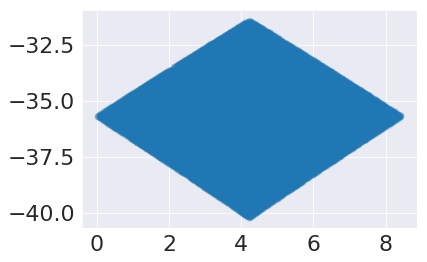

In [224]:
hi = 4101
outfile = outfile_base.format(hi)
gi = upload_dataFrame(outfile,keys='members')
ra, dec = gi['ra'][5:], gi['dec'][5:]
plt.scatter(ra[::20],dec[::20],alpha=0.1)


In [225]:
# cat[w][:5]

In [226]:
gi[gi['haloid']==7940974]

mag_err_i,mag_g,mag_err_r,coadd_object_id_bpz,mag_r,mag_i,z_mean_dnf,id,hpix_16384,mag_err_z,redshift_cos_bpz,ra,z,haloid,coadd_object_id,dec,z_sigma_dnf,rhalo,mag_err_g,mag_z
float32,float32,float32,int64,float32,float32,float64,int64,int64,float32,float64,float32,float64,int64,int64,float32,float64,float32,float32,float32
0.089976,23.658897,0.08524102,105000131984,23.175135,22.880547,0.17052199598061266,8751383,1074902064,0.40936595,0.1830434378456267,3.251472,0.18330554715940572,7940974,105000131984,-37.04765,0.06705408047536143,7.17671,0.092939876,23.591688
0.019001445,21.381285,0.02138754,105000030718,20.519094,19.995716,0.44094977169445837,8754568,1074902918,0.03481545,0.18274272080365894,3.2330577,0.18278942977840318,7940974,105000030718,-36.947502,0.08942370380591601,6.4744153,0.024325442,19.704494
0.07903726,23.426853,0.071995094,105000109810,22.851353,22.596323,0.21784732300764165,8795829,1074913760,0.18993008,0.18437300449592353,3.370681,0.1847358663350263,7940974,105000109810,-36.874577,0.4626411533676608,7.126453,0.08457704,22.610138
0.0061195856,19.407663,0.006383973,105000003526,18.301323,17.900963,0.1827137502446985,8805357,1074916481,0.010535822,0.18279703223344757,3.3185673,0.18293690598200715,7940974,105000003526,-36.766182,0.02236328925787023,4.886858,0.00870382,17.631044
0.09649548,23.683058,0.09255781,105000142486,23.36842,23.040354,0.0,8815082,1074919121,0.18294154,0.18393983014687554,3.5721695,0.18404895046367875,7940974,105000142486,-36.592293,0.0,4.30038,0.08420631,22.993517
0.1251049,23.995483,0.11795295,105000155410,23.669785,23.353199,0.0,8816220,1074919411,0.2090429,0.18161794265598386,3.6053748,0.18174038802530307,7940974,105000155410,-36.530098,0.0,3.4146903,0.10670078,23.162327
0.1511897,24.080687,0.18235679,105000162742,23.929031,23.29444,0.0,8816434,1074919473,0.3105142,0.1809362515545323,3.4304826,0.181277832504522,7940974,105000162742,-36.67162,0.0,5.9762206,0.16131614,23.31901
0.007657192,20.122475,0.007348394,105000008798,18.916279,18.53115,0.3414200697624208,8818888,1074920142,0.012354977,0.18146123820407345,3.3796272,0.18146876266331755,7940974,105000008798,-36.591846,0.06354382829498774,4.8839993,0.010667742,18.206394
0.013274342,19.987518,0.013098353,105000015298,19.419104,19.086077,0.17370312907998509,8819661,1074920361,0.024070697,0.18152054993618183,3.3911166,0.1813211912051794,7940974,105000015298,-36.56114,0.03267211739901638,4.6403227,0.013886265,19.029936


In [227]:
mask = gi['haloid']==7940974
ra, dec = gi['ra'], gi['dec']

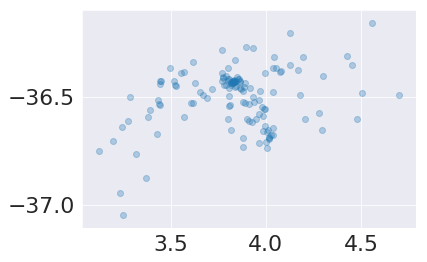

In [228]:
plt.scatter(ra[mask],dec[mask],alpha=0.3)
# plt.scatter(rac,decc)

In [229]:
np.std(gi['coadd_object_id_bpz']-gi['coadd_object_id'])

0.0

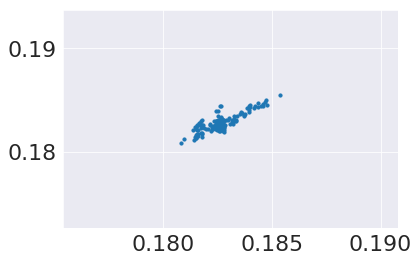

In [235]:
plt.scatter(gi[mask]['redshift_cos_bpz'],gi[mask]['z'],s=10)

In [239]:
(0.32*60/3.)*len(np.unique(cluster_tile))/3600

3.0186666666666664

## Retrieve Second Method

In [ ]:
from time import time

In [ ]:
print('Starting Query')
t0 = time()
time_evolution = np.empty((len(myfields)+1,),dtype=np.float64)
time_evolution[0] = t0

indices_list = []
for i, tile in enumerate(myfields[:3]):
    print('start tile: %i'%(tile))
    outfile = outfile_base.format(tile)

#     match  = esutil.numpy_util.match(tile,hpx8)
#     indices= maglim_idx[match[1]]
#     indices_list.append(indices)
    
    w      = esutil.numpy_util.where1(cluster_tile==tile)
    circles= get_healpix_list(cat[w],nside=Nside)
    
    match  = esutil.numpy_util.match(circles,hpx16384)
    indices= maglim_idx[match[1]]

    
    np.save(f'{array_path}{tile:06d}_indices_arr.npy', indices)
    print(f'array saved: {array_path}{tile:06d}_indices_arr.npy')

    time_evolution[i+1] = time()
    print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
    print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
    print('\n')


In [ ]:
array_path = outdir+'tmp/'
path = 'catalog/gold/'

In [ ]:
indices = hpx8 = 0
master = h5py.File(fname,'r')
gold   = master[path]
for col in columns:
    print(f'{col}')
    array = gold[col][:]
    for indices, tile in zip(indices_list,myfields[:3]):
        sub_array = array[indices]
        np.save(f'{array_path}{tile:06d}_{col}_arr.npy', sub_array)
        print(f'array saved: {array_path}{tile:06d}_{col}_arr.npy')
        sub_array = 0
    array = 0
    print('\n')
master.close()

In [ ]:
for i, tile in enumerate(myfields[:3]):
    print('start tile: %i'%(tile))
    outfile = outfile_base.format(tile)
    gal = load_tmp_file(tile)
    save_hdf5_output(gal,outfile)

In [ ]:
def load_tmp_file(tile):
    mydict = dict().fromkeys(columns)
    indices = np.load(f'{array_path}{tile:06d}_indices_arr.npy')
    mydict['id'] = indices
    for col in columns:
        mydict[col] = np.load(f'{array_path}{tile:06d}_{col}_arr.npy')
    print(mydict)
    return Table(mydict)

In [ ]:
# load files
array = f'{array_path}{tile:06d}_{col}_arr.npy'

In [ ]:
for col in columns[2:5]:
    print(f'{col}')
    array = gold[col][:]
    for indices, tile in zip(indices_list,myfields[:3]):

In [ ]:
## get cluster data

file1= '/global/homes/h/haoyiwu/data/buzzard-1.9.8/buzzard-1.9.8_3y3a_run_halos_lambda_chisq.fit'

cat  = Table(getdata(file1))
cat.rename_column('Z','redshift')

In [ ]:
ra,dec= cat['RA'], cat['DEC']
zcls  = cat['Z_LAMBDA']

zcut  = (zcls<=0.65)&(zcls>=0.2)

#lmask = cat['LAMBDA_CHISQ']>=20. & zcut
lmask = (cat['LAMBDA_CHISQ']>=5.)&(cat['LAMBDA_CHISQ']<=20.)&zcut

#patch = dec<40.#(dec>-0.5)&(dec<0.5)&(ra<30)
#cut = np.where(lmask&patch)

cut = np.where(lmask)


In [ ]:
cat = cat[cut]

In [ ]:
# ra_min,ra_max   = 26.,30.
# dec_min,dec_max = -44.5,-43.

# mask = (cat['RA']<ra_max)&(cat['RA']>ra_min)
# mask&= (cat['DEC']<dec_max)&(cat['DEC']>dec_min)

In [ ]:
cls_columns = ['HALOID', 'M200', 'R200', 'MEM_MATCH_ID', 'RA', 'DEC', 'redshift', 'Z_COS', 'P_BCG', 'Z_LAMBDA', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_CHISQ_ZORIG',
               'SCALEVAL', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'MASKFRAC', 'GEOMASKFRAC', 'R_LAMBDA', 'R_MASK', 'Z_LAMBDA_E', 'NCROSS', 'Z_LAMBDA_NITER', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 
               'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2','Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'BCG_SPEC_Z', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD']

cat = cat[cls_columns]

In [ ]:
print(len(cat))

### Healpix Matching

In [ ]:
import sys
# sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/buzzardSelection/scripts/')
sys.path.append('/global/u2/j/jesteves/codes/buzzardAnalysis/buzzardSelection/scripts/')
from helper import AngularDistance,get_healpix_list,radec_pix

In [ ]:
# ra,dec= cat['RA'], cat['DEC']
# lmask = cat['LAMBDA_CHISQ']>5.
# patch = (dec>-0.5)&(dec<0.5)&(ra<30)

# cut = np.where(lmask&patch)

In [ ]:
rad2deg  = 180/np.pi
rmax     = 8 #Mpc around each cluster

#r200     = cat['R200'][:]*0.7 ## Mpc
DA       = np.ones_like(np.array(cat['redshift']))
# DA[cut]  = AngularDistance(np.array(cat['redshift'][cut]))
DA  = AngularDistance(np.array(cat['redshift']))

## compute the radii max
cat['rmax']  = 60*(float(rmax)/DA)*rad2deg ## arcmin

In [ ]:
ra,dec= cat['RA'], cat['DEC']
cluster_tile = radec_pix(ra,dec,nside=8)

In [ ]:
_ = plt.hist(cluster_tile,bins=51)

In [ ]:
#plt.hist(cat['redshift'])

In [ ]:
tiles

In [ ]:
np.where(cluster_tile==tiles[0])

### Retrieving Galaxy Catalogs

In [36]:
def save_hdf5_output(gal,outfile):
    df  = gal.to_pandas()
    df.to_hdf(outfile, key='members', mode='w')

    gal = 0

In [ ]:
def load_hdf_files(infile,indices,columns,path='catalog/gold/'):
    master = h5py.File(infile,'r')
    gold   = master[path]
    
    mydict = dict().fromkeys(columns)
    
    mydict['id'] = indices
    for col in columns:
        mydict[col] = gold[col][:][indices]
    
    master.close()
    return Table(mydict)

In [ ]:
from time import time

In [ ]:
# fname  = path+'Buzzard_v1.9.8_Y3a_bpz.h5'
# indexes= h5py.File(fname)
# bpz    = indexes['catalog/bpz']

# #b_cid  = bpz['coadd_object_id'][:][maglim_idx]
# z      = bpz['z'][:][maglim_idx]
# zmean  = bpz['zmean_sof'][:][maglim_idx]

# indexes.close()

In [ ]:
indexes= h5py.File(fname_aux,'r')
dnf    = indexes['catalog/dnf/unsheared']

d_cid  = dnf['coadd_object_id'][:][maglim_idx]
d_z    = dnf['z'][:][maglim_idx]
d_zmean= dnf['z_mean'][:][maglim_idx]
d_sigma= dnf['z_sigma'][:][maglim_idx]

indexes.close()

In [ ]:
## BE CAREFULL! The cells below take about an hour to run

In [ ]:
outdir = '/global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/'
outfile_base = outdir+'buzzard_y3_v2.0.0_all_raw_copper_hpx8_{}.hdf'

In [ ]:
fname  = path+'Buzzard_v1.9.8_Y3a_gold.h5'

t0 = time()

time_evolution = np.empty((len(tiles)+1,),dtype=np.float64)
time_evolution[0] = t0

for i, tile in enumerate(tiles):
    print('start tile: %i'%(tile))
    outfile = outfile_base.format(tile)
    w       = np.where(cluster_tile==tile)[0]

    if (len(w)>1) & (not os.path.isfile(outfile)):
        circles= get_healpix_list(cat[w],nside=16384)
        match  = esutil.numpy_util.match(circles,hpx16384)
        indices= maglim_idx[match[1]]
        print('matching: done')
        data               =  load_hdf_files(fname,indices,columns,path='catalog/gold/')
        #data['z']          = z[match[1]]
        #data['z_mean_bpz'] = zmean[match[1]]
        
        print('loading main data: done')
        data['z']          = d_z[match[1]]
        data['z_mean_dnf'] = d_zmean[match[1]]
        data['z_sigma_dnf']= d_sigma[match[1]]

        data['index']= indices
        data['tile'] = tile

        save_hdf5_output(data,cat[w],outfile)
        data = 0
        print('outfile saved: %s'%(outfile))
    else:
        print('Error: empty tile')
    
    time_evolution[i+1] = time()
    print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
    print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
    print('\n')

In [ ]:
import pandas as pd
from astropy.table import Table

In [ ]:
def upload_dataFrame(infile,keys='members'):
    hdf = pd.HDFStore(infile, mode='r')
    df1 = hdf.get(keys)
    hdf.close()
    data = Table.from_pandas(df1)
    return data

In [ ]:
hi = 560
outfile = outfile_base.format(hi)

In [ ]:
gi = upload_dataFrame(outfile,keys='members')
ra, dec = gi['ra'], gi['dec']

In [ ]:
# np.count_nonzero(gi['z_mean_dnf']<0)

In [ ]:
# 1.*np.count_nonzero(gi['z_mean_dnf'])/len(gi)


In [ ]:
# w = np.where(cluster_tile==hi)[0]
# rac,decc = cat['RA'][w],cat['DEC'][w]

# #circles= get_healpix_list(cat[w],nside=16384)
# #match  = esutil.numpy_util.match(circles,hpx16384)

In [ ]:
plt.scatter(ra[::10],dec[::10],alpha=0.3)
# plt.scatter(rac,decc)

In [ ]:
gi

In [ ]:
import healpy as hp
def hpix2ang(pix,nside=1024):
    lon,lat = hp.pix2ang(nside,pix,nest=True)
    dec,ra=(90-(lon)*(180/np.pi)),(lat*(180/np.pi))
    return ra,dec

In [ ]:
ra, dec = hpix2ang(circles,nside=16384)
gra,gdec = hpix2ang(myidx,nside=16384)

In [ ]:
plt.scatter(ra[::10],dec[::10])
plt.scatter(gra[::1000],gdec[::1000])

In [ ]:
data =  load_hdf_files(fname,maglim_idx[match[1]],columns,path='catalog/gold/')

In [ ]:
plt.plot(match[1],data['id'])

In [ ]:
plt.plot(data['hpix_16384'],hpx16384[match[1]])

In [ ]:
maglim_idx[match[1]]

In [ ]:
master  = h5py.File(fname,'r')
indexes= h5py.File(fname_aux,'r')

#select  = indexes['index/gold/select'][:]
# myidx   = master['catalog/gold/hpix_16384'][:][maglim_idx[match[1]]]
# mag_i   = master['catalog/gold/mag_i'][:][maglim_idx[match[1]]]

master.close()
indexes.close()

In [ ]:
maglim_idx[match[1]]

In [ ]:
data=0

In [ ]:
hpx16384[data['id']]

In [ ]:
myidx

In [ ]:
match[1]

In [ ]:
rag,decg = data['ra'], data['dec']

In [ ]:
plt.scatter(ra[::10],dec[::10])
plt.scatter(rag[::100],decg[::100],alpha=0.1)

In [ ]:
plt.scatter(data['hpix_16384'][::100],myidx[::100])



In [ ]:
gi=0